In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# A)
df = pd.read_csv('/content/drive/MyDrive/Al/Datasets/bank.csv')
col_obj = df.select_dtypes(include='object').columns #select_dtype() pandas ko function jasle dataype jun chiayo tesko colum select garcha,
                                                     # include ra exclude huncha yesma include use because hami lai yo dataframe ma kati ota data type cha tha chaina
                                                     #.colmun le column name matra lincha natra whole column ma k cha tyo dekhaucha

col_obj


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [85]:
# B)
print("\nUnique values of object columns:")
for col in col_obj:  # for loop lagayera col_obj ma bhako colum name lai access garcha ani col bhannea variable ma rakhcha
    print(f"\nColumn: {col}") # column name print garaucha using f-string
    print(df[col].unique()) # df[col] le chai df(dataframe) ma bhako single single column or series lai select garcha ani an
                            # .unique() le chai le chai sabai unique value return garcha like if job column ma 4 jana technician cha bhane 1 matra garcha


Unique values of object columns:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


In [86]:
# C)
print("\nNull values in each column:")
print(df.isnull().sum()) #df.isnull() le chai df ma bhakao each cell check garcha ani boolean value return i.e 1 or 0 where
                        # 1 is ture  and 0 is false if cell ma Nan(not a number), empty or none cha bhane 1 return garcne bhayo
                        # and if data cha bhane chai 0 return garcha
                        # ani .sum() chai if 1 cha bhane add gardai  totals sum nikal cha , hamro case ma chai saab 0 return bhako cha so total 0 aayo


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [87]:
#3
df_numeric = df.select_dtypes(exclude='object')  #naaya variable df_numeric ma store gareko yo chai yesma chai data fraame ma bhako object bahek aaru chai store garne or object lai chai include nagari aarkao table banako
df_numeric.to_csv("banknumericdata.csv", index=False) # .to_csv le chai df_numeric  lai csv format ma save garcha ani index = False rakhyo bhane chai idexing didaina row haruko natra dincha
# print(df)
print(df_numeric.head(10)) #first 10 ota data print garne
print(df_numeric.dtypes) #kun datatype ho bhanera dekhaucha .dtype le


   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
5   35      231    5       139         1     -1         0
6   28      447    5       217         1     -1         0
7   42        2    5       380         1     -1         0
8   58      121    5        50         1     -1         0
9   43      593    5        55         1     -1         0
age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object


In [88]:
#4
df_numeric = pd.read_csv("banknumericdata.csv")
print(df_numeric.describe()) #.describe le chai saab statistics value dincha jun columnn ma numeric value cha tesko matra

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [89]:
# Problem 2 - Data Imputations:
#2.1
df2 = pd.read_csv("/content/drive/MyDrive/Al/Datasets/medical_students_dataset.csv")
df2

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [90]:
#2.2

#check info()
df2.info()

print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

In [91]:
df2


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [92]:
#2.3
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
            'Heart Rate', 'Blood Pressure', 'Cholesterol']
# Numerical continuous columns
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
            'Heart Rate', 'Blood Pressure', 'Cholesterol']

for col in num_cols:
    df2[col] = df2[col].fillna(df2[col].median())


# Categorical
cat_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in cat_cols:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

# Student ID (unique identifier)
df2['Student ID'] = df2['Student ID'].fillna(method='ffill')
df2['Student ID'] = df2['Student ID'].fillna(method='bfill')
print(df2.isnull().sum())


Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [93]:
print("Duplicate rows are:", df2.duplicated().sum())
df2 = df2.drop_duplicates()
print("After removing:", df2.duplicated().sum())

Duplicate rows are: 12842
After removing: 0


In [94]:
#Titanic
#1
df3 = pd.read_csv('/content/drive/MyDrive/Al/Datasets/Titanic-Dataset.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
#2
#Create subset for required columns
subset_df3 = df3[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df3 = subset_df3[subset_df3['Pclass'] == 1]
mean = first_class_df3['Fare'].mean()
median = first_class_df3['Fare'].median()
max = first_class_df3['Fare'].max()
min = first_class_df3['Fare'].min()
print("Mean Fare:", mean)
print("Median Fare:", median)
print("Max Fare:", max)
print("Min Fare:", min)
first_class_df3.head()

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [96]:
# Count null values in age
null_age_count = subset_df3['Age'].isnull().sum()
print(null_age_count)

# Drop rows with null age values
subset_df3 = subset_df3.dropna(subset=['Age'])
print(len(subset_df3))

177
714


In [97]:
#3
df4 = pd.read_csv('/content/drive/MyDrive/Al/Datasets/Titanic-Dataset.csv')
#One-hot encode Embarked column
embarked_dummies = pd.get_dummies(df4['Embarked'], prefix="Embarked")
#Add new columns
df4 = pd.concat([df4, embarked_dummies], axis=1)
#Drop original column
df4.drop(columns=['Embarked'], inplace=True)
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


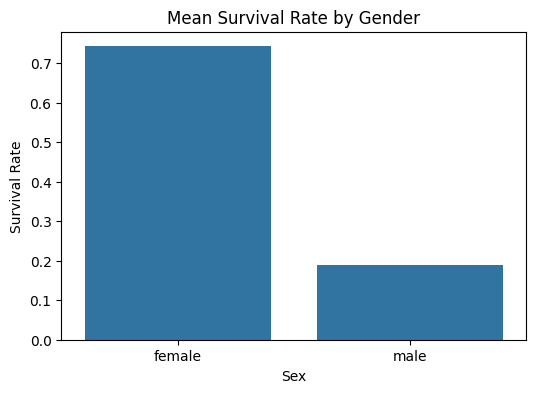

In [98]:
#4
import matplotlib.pyplot as plt
survival_by_sex = df4.groupby('Sex')['Survived'].mean()
print(survival_by_sex)
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

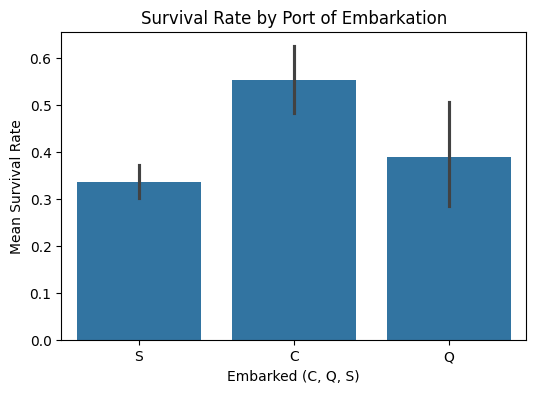

In [99]:
df4 = pd.read_csv('/content/drive/MyDrive/Al/Datasets/Titanic-Dataset.csv')
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df4)
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Embarked (C, Q, S)")
plt.ylabel("Mean Survival Rate")
plt.show()